In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("Final.csv")

In [3]:
df=df[[ 'Distance (km)', 'Delayed', 'Origin_Ahmedabad',
       'Origin_Bangalore', 'Origin_Chennai', 'Origin_Delhi',
       'Origin_Hyderabad', 'Origin_Jaipur', 'Origin_Kolkata', 'Origin_Lucknow',
       'Origin_Mumbai', 'Origin_Pune', 'Destination_Ahmedabad',
       'Destination_Bangalore', 'Destination_Chennai', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Jaipur', 'Destination_Kolkata',
       'Destination_Lucknow', 'Destination_Mumbai', 'Destination_Pune',
       'Vehicle Type_Container', 'Vehicle Type_Lorry', 'Vehicle Type_Trailer',
       'Vehicle Type_Truck', 'Expected_Delivery_Time']]

In [4]:
df

,Distance (km),Delayed,Origin_Ahmedabad,Origin_Bangalore,Origin_Chennai,Origin_Delhi,Origin_Hyderabad,Origin_Jaipur,Origin_Kolkata,Origin_Lucknow,...,Destination_Jaipur,Destination_Kolkata,Destination_Lucknow,Destination_Mumbai,Destination_Pune,Vehicle Type_Container,Vehicle Type_Lorry,Vehicle Type_Trailer,Vehicle Type_Truck,Expected_Delivery_Time
0,1863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
1,1374,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,4
2,324,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,778,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,2
4,314,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,1411,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,4
6922,1485,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,4
6923,1806,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,6
6924,1261,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4


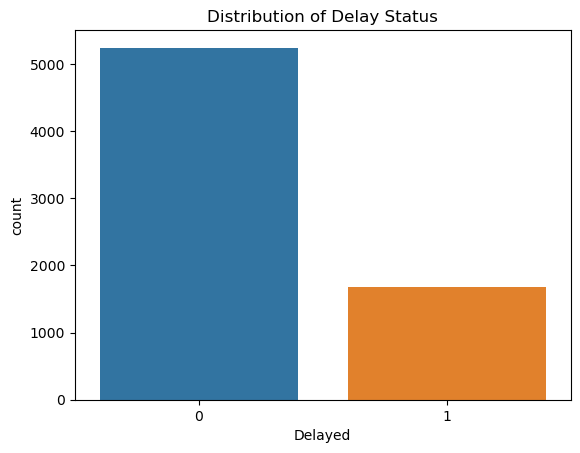

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Delayed', data=df)
plt.title('Distribution of Delay Status')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target (y)
X = df.drop(columns=['Delayed'])
y = df['Delayed']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1031
           1       1.00      0.02      0.03       355

    accuracy                           0.75      1386
   macro avg       0.87      0.51      0.44      1386
weighted avg       0.81      0.75      0.64      1386



C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


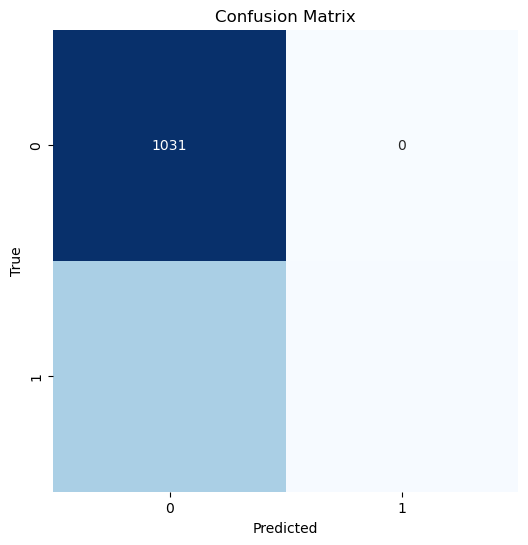

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1031
           1       0.28      0.19      0.22       355

    accuracy                           0.67      1386
   macro avg       0.51      0.51      0.51      1386
weighted avg       0.63      0.67      0.64      1386



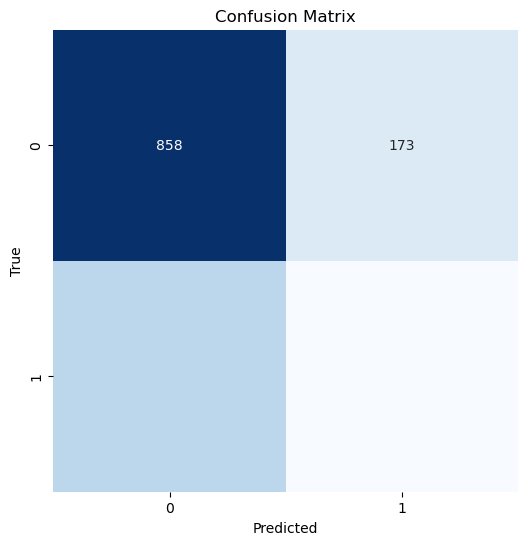

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1031
           1       0.33      0.07      0.11       355

    accuracy                           0.73      1386
   macro avg       0.54      0.51      0.48      1386
weighted avg       0.64      0.73      0.65      1386



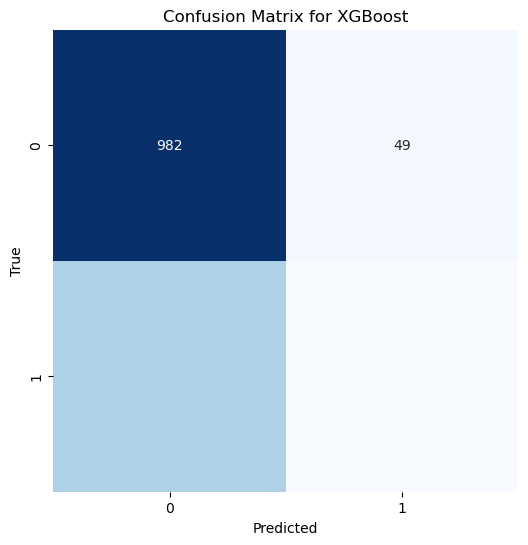

In [11]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print('Classification Report for XGBoost:')
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf node
            
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, 
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best accuracy score for Random Forest:", rf_grid_search.best_score_)

# Evaluate the best Random Forest model
y_pred_rf = rf_grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy score for Random Forest: 0.7631767169311875
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1031
           1       1.00      0.02      0.04       355

    accuracy                           0.75      1386
   macro avg       0.87      0.51      0.45      1386
weighted avg       0.81      0.75      0.65      1386



In [13]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],            # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],          # Step size shrinking
    'max_depth': [3, 6, 10],                     # Maximum depth of a tree
    'subsample': [0.8, 1.0],                     # Fraction of samples to be used for fitting each tree              # Balance the weight for imbalanced classes
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, 
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
xgb_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best accuracy score for XGBoost:", xgb_grid_search.best_score_)

# Evaluate the best XGBoost model
y_pred_xgb = xgb_grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best accuracy score for XGBoost: 0.7631770102239916
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1031
           1       1.00      0.02      0.04       355

    accuracy                           0.75      1386
   macro avg       0.87      0.51      0.45      1386
weighted avg       0.81      0.75      0.65      1386



WHICH IS EXPECTED AS RECALL OF DELAYED=1 IS LOW AS WHILE DEPLOYING THE MODEL WE WILL INCORPORATE OF ELSE CONDITION ON WEATHER AND TRAFFIC CONDITION THAT WILL OVERALL INCREASE THE RECALL AND F2 SCORE OF CLASS 1

In [17]:
import joblib

# Save the best model after GridSearchCV
joblib.dump(rf_grid_search.best_estimator_, 'without_traffic_weather.pkl')

print("Model saved successfully!")


Model saved successfully!
